In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib as mpl

## Perceptron

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int) # Iris setosa?

In [ ]:
def plot_clf(clf, axes, *args, **kwargs):
    x0 = np.linspace(axes[0], axes[1], 200)
    x1 = np.linspace(axes[2], axes[3], 200)

    x0s, x1s = np.meshgrid(x0, x1)
    X_new = np.c_[x0s.ravel(), x1s.ravel()]
    yy_pred = clf.predict(X_new).reshape(x0s.shape)

    plt.contourf(x0s, x1s, yy_pred, *args, **kwargs)
    plt.axis(axes)

### Sci-kit learn

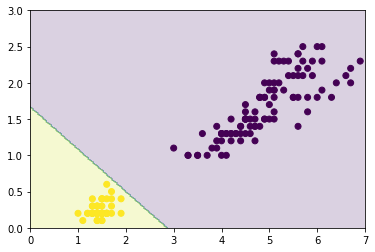

In [ ]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X, y)

plot_clf(per_clf, [0, 7, 0, 3], alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### SGDClassifier

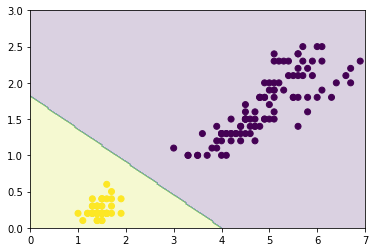

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=1, penalty=None)
sgd_clf.fit(X, y)

plot_clf(sgd_clf, [0, 7, 0, 3], alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Custom

1 / 10 epochs
3 / 10 epochs
5 / 10 epochs
7 / 10 epochs
9 / 10 epochs


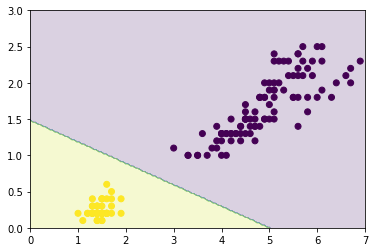

In [ ]:
class CustomThresholdLogicalUnit:
    def __init__(self, lr=1, epochs=10, activation=None, verbose_epochs_mod=1):
        self.lr = lr
        self.epochs = epochs
        self.activation_fn = activation
        self.verbose_epochs_mod = verbose_epochs_mod

    def fit(self, X, y):
        X, _ = self._fix_X_shape(X)

        self.weights = np.zeros((X.shape[1] + 1, 1))

        for epoch in range(self.epochs):
            for X_sample, y_sample in zip(X, y):
                prediction = self.predict(X_sample)[0]
                X_with_bias = np.concatenate([X_sample.copy(), [1]])
                gradient = self.lr * (y_sample - prediction) * X_with_bias
                gradient = gradient.reshape(-1, 1)
                self.weights = self.weights + gradient
            
            if self.verbose_epochs_mod and epoch % self.verbose_epochs_mod == 0 :
                print(f'{epoch + 1 } / {self.epochs} epochs')
        
        return self

    def predict(self, X):
        X, X_ndim = self._fix_X_shape(X)
        X= np.c_[X, np.ones((X.shape[0], 1))] # Bias

        predictions = self.activation(X.dot(self.weights))

        return predictions if X_ndim == 2 else predictions[0]

    def activation(self, X):
        X, X_ndim = self._fix_X_shape(X)

        if self.activation_fn:
            activation = self.activation_fn(X)
            return activation if X_ndim == 2 else activation[0]
        else:
            activation = (X >= 0).astype(np.int)
            return activation if X_ndim == 2 else activation[0]

    def _fix_X_shape(self, X):
        X_copy = X.copy()
        X_copy_ndim = X_copy.ndim
        
        if X_copy_ndim == 1:
            return X_copy.reshape(1, -1), 1
        elif X_copy_ndim == 2:
            return X_copy, 2
        else:
            assert X_copy_ndim == 2, 'Incorrect X shape'

def logistic(X):
    if type(X) == list:
        X = np.array(X)
    assert type(X) in (np.ndarray, list), 'Bad X type'

    logistic = 1 / (1 + np.exp(-X) )
    return (X >= 0.5).astype(np.int)

tlu_clf = CustomThresholdLogicalUnit(verbose_epochs_mod=2, epochs=10, lr=0.1, activation=logistic).fit(X, y)

plot_clf(tlu_clf, [0, 7, 0, 3], alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()